# Session 5: Data munging with Pandas

## [EAA - ARC Python Primer for Accounting Research](https://martien.netlify.app/book/example/)

#### Use Pandas to explore, manage, clean data, deal with missing observations.
---

The cells below demonstrate how use Pandas to explore, manage, clean data, deal with missing observations.

The focus of this session is on the use of [Pandas](https://pandas.pydata.org/), your friend for analyzing **Pa**nel **Da**ta.

We will download and munge Google mobility data. 

An assignment, separately published, then will apply the techniques learned in this lesson to accounting data from U.S. bank holding companies (free, high-quality accounting data).

Learning objectives:

 - Download  and explore data from the cloud
 - Make column names look pretty
 - Use the index of a data frame
 - Use the index to select rows
 - Select rows based on date(s)
 - Dealing with missing observations
 - Appending, replacing, and joining data
 - Make a pretty graph
 - Write functions

### Google mobility data

This data shows how your community is moving around differently due to [COVID-19](https://www.google.com/covid19/mobility/). The data is available via this [link](https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv).

Downloading takes some time, as it is big. We save the data to disk, compressed, to save space.

At the end of the session we will write a function that produces data for this graph:

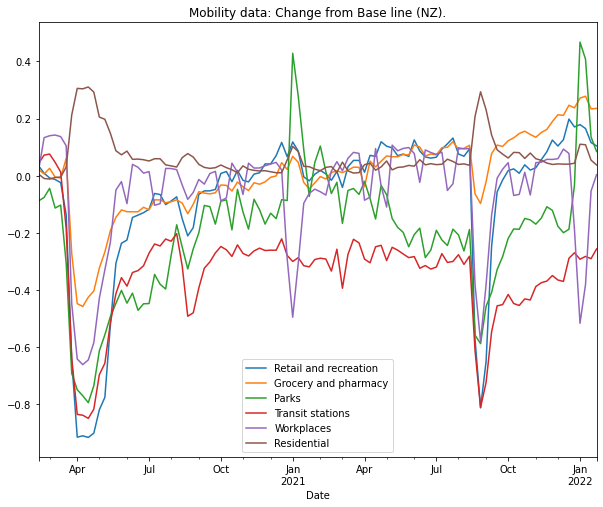

**Let's start!**

In [1]:
import pandas as pd 
import numpy as np

Normally you need not set the low_memory option to False, but hey, this is big data!

In [2]:
df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv', low_memory=False)

Let's save the data, compressed, and ignore the index for now. I will come back to indexes shortly.

In [3]:
df.to_csv('Global_Mobility_Report.csv.zip', compression='zip', index=False)

We can read the data using the following command. No need to unzip the zip file.

In [4]:
df = pd.read_csv('Global_Mobility_Report.csv.zip', low_memory=False)



**Let's explore the data frame:**

In [5]:
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


**Question**: How to show the last row(s) of the data frame?

In [6]:
df.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
8525283,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-01-17,NaN,NaN,NaN,NaN,40.0,NaN
8525284,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-01-18,NaN,NaN,NaN,NaN,56.0,NaN
8525285,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-01-19,NaN,NaN,NaN,NaN,55.0,NaN
8525286,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-01-20,NaN,NaN,NaN,NaN,51.0,NaN
8525287,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-01-21,NaN,NaN,NaN,NaN,63.0,NaN


More information on our data frame:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8525288 entries, 0 to 8525287
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline   

In [8]:
df.count()

country_region_code                                   8519911
country_region                                        8525288
sub_region_1                                          8383929
sub_region_2                                          7134788
metro_area                                              45950
iso_3166_2_code                                       1491050
census_fips_code                                      1757180
place_id                                              8509726
date                                                  8525288
retail_and_recreation_percent_change_from_baseline    5277514
grocery_and_pharmacy_percent_change_from_baseline     5046365
parks_percent_change_from_baseline                    4039273
transit_stations_percent_change_from_baseline         4233289
workplaces_percent_change_from_baseline               8215235
residential_percent_change_from_baseline              5166367
dtype: int64

In [9]:
df['country_region'].value_counts()

United States       1823423
Brazil              1426620
India                472704
Turkey               388282
Argentina            298794
                     ...   
Malta                   709
Kazakhstan              709
Papua New Guinea        706
Guinea-Bissau           684
Liechtenstein           673
Name: country_region, Length: 135, dtype: int64

In [10]:
print(f'Shape {df.shape}, rows: {df.shape[0]}, columns: {df.shape[1]}')

Shape (8525288, 15), rows: 8525288, columns: 15


**Question**: can we use a shorter command to show the number of rows in the data frame?

In [11]:
len(df)

8525288

**Question**: How can we quickly list the column variables?

In [12]:
list(df)

['country_region_code',
 'country_region',
 'sub_region_1',
 'sub_region_2',
 'metro_area',
 'iso_3166_2_code',
 'census_fips_code',
 'place_id',
 'date',
 'retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

---

**Note the following in the data frame:**

- The column names look awful, we will change that.
- The leftmost column is the index. The index here is not meaningful. But we will make a habit of using the index. It is an extremely powerful feature of Pandas! 
- The number of observations is large: > 8 million. To make our life easy, we will keep only a few countries. 
- The date column is a float, we should turn that in a date variable.
- There are observations called NaN, these are empty cells, and we will learn how to manage them. 

In [13]:
df.head(10)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
5,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-20,-2.0,1.0,6.0,1.0,1.0,1.0
6,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-21,-3.0,2.0,6.0,0.0,-1.0,1.0
7,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-22,-2.0,2.0,4.0,-2.0,3.0,1.0
8,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-23,-1.0,3.0,3.0,-1.0,4.0,1.0
9,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-24,-3.0,0.0,5.0,-1.0,3.0,1.0


---

### Changing column names ###

The column names are very long. Let's make the shorter by eliminating this part:`_percent_change_from_baseline` from each column name.

We use list comprehension to accomplish that. While walking over each column name, we eliminate the unwanted parts from each of them. 

In [14]:
df.columns = [x.replace('_percent_change_from_baseline', '') for x in list(df)]
df.columns = [x.replace('_', ' ') for x in df]  # get rid of underscores
df.columns = [x.strip() for x in df]  # get rid of leading and lagging space (like Excel's 'trim')
df.columns = [x.capitalize() for x in df]  # Even nicer!
df.head(3)

,Country region code,Country region,Sub region 1,Sub region 2,Metro area,Iso 3166 2 code,Census fips code,Place id,Date,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0


In [15]:
list(df)

['Country region code',
 'Country region',
 'Sub region 1',
 'Sub region 2',
 'Metro area',
 'Iso 3166 2 code',
 'Census fips code',
 'Place id',
 'Date',
 'Retail and recreation',
 'Grocery and pharmacy',
 'Parks',
 'Transit stations',
 'Workplaces',
 'Residential']

**Question**: We use four lines to change the column names. That is too much. Can we make the code in the cell above more efficient?

In [16]:
df.columns = [x.replace('_percent_change_from_baseline', '').replace('_', ' ').strip().capitalize() for x in df]

In [17]:
df.columns

Index(['Country region code', 'Country region', 'Sub region 1', 'Sub region 2',
       'Metro area', 'Iso 3166 2 code', 'Census fips code', 'Place id', 'Date',
       'Retail and recreation', 'Grocery and pharmacy', 'Parks',
       'Transit stations', 'Workplaces', 'Residential'],
      dtype='object')

---

**Setting the index**

Let's start with setting an index, as that will make it easier to manage the data. 

You can change the index whenever you want, so don't worry too much about setting them right or wrong.

In this case I will set `country_region_code` as the index, because we want to select country observations.


In [18]:
df = df.set_index('Country region code')
df.index

Index(['AE', 'AE', 'AE', 'AE', 'AE', 'AE', 'AE', 'AE', 'AE', 'AE',
       ...
       'ZW', 'ZW', 'ZW', 'ZW', 'ZW', 'ZW', 'ZW', 'ZW', 'ZW', 'ZW'],
      dtype='object', name='Country region code', length=8525288)

In [19]:
df.head(3)

,Country region,Sub region 1,Sub region 2,Metro area,Iso 3166 2 code,Census fips code,Place id,Date,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Country region code,,,,,,,,,,,,,,
AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0


Note the index is now in **boldface**.


---

**Keeping the data manageable**

- For now, we want only New Zealand data.
- We also don't want all identifying variables: we keep  the last 7 columns (from `date` to `residential_percent_change_from_baseline`.)

To accomplish this we can use `loc` or, alternatively, the index. 

In [20]:
# using loc, but for now not specifying columns
dfnz = df.loc[df['Country region']=="New Zealand"]
dfnz.head(3)

,Country region,Sub region 1,Sub region 2,Metro area,Iso 3166 2 code,Census fips code,Place id,Date,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Country region code,,,,,,,,,,,,,,
NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2020-02-15,8.0,5.0,0.0,8.0,4.0,0.0
NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2020-02-16,4.0,4.0,-11.0,7.0,0.0,1.0
NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2020-02-17,-2.0,-2.0,-5.0,15.0,31.0,-3.0


In [21]:
# using loc, specifying two columns. Note that the columns we need are in a list, between brackets.
dfnz = df.loc[df['Country region']=="New Zealand", ['Date', 'Residential']]
dfnz.head(3)

,Date,Residential
Country region code,,
NZ,2020-02-15,0.0
NZ,2020-02-16,1.0
NZ,2020-02-17,-3.0


In [22]:
# using loc, specifying columns the columns we need, with sliced column names:
dfnz = df.loc[df['Country region']=="New Zealand",'Date':'Residential']
dfnz.head(3)

,Date,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Country region code,,,,,,,
NZ,2020-02-15,8.0,5.0,0.0,8.0,4.0,0.0
NZ,2020-02-16,4.0,4.0,-11.0,7.0,0.0,1.0
NZ,2020-02-17,-2.0,-2.0,-5.0,15.0,31.0,-3.0


---

**Data selection using the index** 

The loc. syntax is not always practical, especially if you select rows using multiple criteria. 

In many cases you can select rows using the index. 

Let's, for now, select data from the Netherlands using the index (NL). Remember, we set the index to `country_region_code` a while ago.

In [23]:
dfnl = df.loc["NL"]
dfnl.head(3)

,Country region,Sub region 1,Sub region 2,Metro area,Iso 3166 2 code,Census fips code,Place id,Date,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Country region code,,,,,,,,,,,,,,
NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-15,1.0,1.0,11.0,3.0,0.0,0.0
NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-16,-10.0,-8.0,-31.0,-5.0,-3.0,2.0
NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-17,0.0,-1.0,8.0,-3.0,-5.0,1.0


---

**Combining selections**

**Question**: using the index, can we combine selections, e.g. from a list of countries, say `["NL","NZ"]`?

In [24]:
dfnlnz = df.loc[["NL", "NZ"]]
# Show the head of the newly created data frame dfnlnz:
dfnlnz

,Country region,Sub region 1,Sub region 2,Metro area,Iso 3166 2 code,Census fips code,Place id,Date,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Country region code,,,,,,,,,,,,,,
NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-15,1.0,1.0,11.0,3.0,0.0,0.0
NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-16,-10.0,-8.0,-31.0,-5.0,-3.0,2.0
NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-17,0.0,-1.0,8.0,-3.0,-5.0,1.0
NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-18,5.0,4.0,21.0,-3.0,-5.0,1.0
NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-19,3.0,0.0,20.0,-3.0,-5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NZ,New Zealand,West Coast,NaN,NaN,NZ-WTC,NaN,ChIJ2Yjvx8umJW0Romz7lRXnyOE,2022-01-19,-5.0,NaN,-54.0,NaN,2.0,NaN
NZ,New Zealand,West Coast,NaN,NaN,NZ-WTC,NaN,ChIJ2Yjvx8umJW0Romz7lRXnyOE,2022-01-20,0.0,NaN,-46.0,NaN,4.0,NaN
NZ,New Zealand,West Coast,NaN,NaN,NZ-WTC,NaN,ChIJ2Yjvx8umJW0Romz7lRXnyOE,2022-01-21,14.0,NaN,-37.0,NaN,4.0,NaN


In [25]:
# Show the tail of dfnlnz:
dfnlnz.head()

,Country region,Sub region 1,Sub region 2,Metro area,Iso 3166 2 code,Census fips code,Place id,Date,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Country region code,,,,,,,,,,,,,,
NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-15,1.0,1.0,11.0,3.0,0.0,0.0
NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-16,-10.0,-8.0,-31.0,-5.0,-3.0,2.0
NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-17,0.0,-1.0,8.0,-3.0,-5.0,1.0
NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-18,5.0,4.0,21.0,-3.0,-5.0,1.0
NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-19,3.0,0.0,20.0,-3.0,-5.0,1.0


---

**Specify columns when we select rows using the index**

We specify the columns in a bracketed list:

In [26]:
dfnl = df[['Date','Residential']].loc["NL"]
dfnl.head(3)

,Date,Residential
Country region code,,
NL,2020-02-15,0.0
NL,2020-02-16,2.0
NL,2020-02-17,1.0


---
Finally selecting the last 7 columns of the data frame for the New Zealand.

In [27]:
dfnz = df.loc["NZ", 'Date':'Residential']
dfnz.head(3)

,Date,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Country region code,,,,,,,
NZ,2020-02-15,8.0,5.0,0.0,8.0,4.0,0.0
NZ,2020-02-16,4.0,4.0,-11.0,7.0,0.0,1.0
NZ,2020-02-17,-2.0,-2.0,-5.0,15.0,31.0,-3.0


In [28]:
dfnz.shape

(11932, 7)

---

**Saving the data**

We now have a much more easy to manage data frame. Let's save it. 

We want to keep the index, so we save the csv file without using the `index=False` parameter.

In [29]:
dfnz.to_csv('New_Zealand_Mobility_Report.csv')
dfnz.head(3)

,Date,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Country region code,,,,,,,
NZ,2020-02-15,8.0,5.0,0.0,8.0,4.0,0.0
NZ,2020-02-16,4.0,4.0,-11.0,7.0,0.0,1.0
NZ,2020-02-17,-2.0,-2.0,-5.0,15.0,31.0,-3.0


If you retrieve the csv data, you will need to set the index again, but don't worry about that for now.

In [30]:
dfnz = pd.read_csv('New_Zealand_Mobility_Report.csv')
dfnz.head(3)

,Country region code,Date,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
0,NZ,2020-02-15,8.0,5.0,0.0,8.0,4.0,0.0
1,NZ,2020-02-16,4.0,4.0,-11.0,7.0,0.0,1.0
2,NZ,2020-02-17,-2.0,-2.0,-5.0,15.0,31.0,-3.0


---

### Changing the date column in a proper date-time format ###


We should change the date column in a proper date format. This allows us select rows on the basis of dates. 

We set the date column as index:

In [31]:
dfnz['Date']= pd.to_datetime(dfnz['Date'])

dfnz.set_index('Date', inplace=True) # This is equivalent to dfnz = dfnz.set_index('date'). 
                                     # The `inplace` parameter allows for shorter writing.

In [32]:
dfnz

,Country region code,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Date,,,,,,,
2020-02-15,NZ,8.0,5.0,0.0,8.0,4.0,0.0
2020-02-16,NZ,4.0,4.0,-11.0,7.0,0.0,1.0
2020-02-17,NZ,-2.0,-2.0,-5.0,15.0,31.0,-3.0
2020-02-18,NZ,-1.0,2.0,1.0,8.0,15.0,-1.0
2020-02-19,NZ,1.0,2.0,0.0,11.0,14.0,-2.0
...,...,...,...,...,...,...,...
2022-01-19,NZ,-5.0,NaN,-54.0,NaN,2.0,NaN
2022-01-20,NZ,0.0,NaN,-46.0,NaN,4.0,NaN
2022-01-21,NZ,14.0,NaN,-37.0,NaN,4.0,NaN


Given that our data is only from New Zealand we do not need the `Country region code` column. 

In [33]:
dfnz.drop("Country region code", inplace=True, axis ='columns')  # To drop labels from columns set axis 1 or ‘columns’.

In [34]:
dfnz.tail(3)

,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Date,,,,,,
2022-01-21,14.0,NaN,-37.0,NaN,4.0,NaN
2022-01-22,-4.0,NaN,-31.0,NaN,-5.0,NaN
2022-01-23,-8.0,NaN,-26.0,NaN,NaN,NaN


---

**Date selection using the index** 

With Date as index, it is easy to select rows based on dates. Again, the index shows how powerful indexing is.

In [35]:
# All observations from 2020:
dfnz.loc['2020'].tail(2)

,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Date,,,,,,
2020-12-30,30.0,NaN,41.0,NaN,-40.0,NaN
2020-12-31,NaN,NaN,16.0,NaN,-36.0,NaN


**Question**: Using the index, show only observations from this month:

In [36]:
dfnz.loc['2022-01']

,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Date,,,,,,
2022-01-01,-27.0,-19.0,34.0,-50.0,-44.0,7.0
2022-01-02,3.0,10.0,38.0,-42.0,-21.0,2.0
2022-01-03,15.0,26.0,78.0,-50.0,-73.0,13.0
2022-01-04,5.0,23.0,73.0,-55.0,-75.0,17.0
2022-01-05,12.0,33.0,41.0,-50.0,-49.0,13.0
...,...,...,...,...,...,...
2022-01-19,-5.0,NaN,-54.0,NaN,2.0,NaN
2022-01-20,0.0,NaN,-46.0,NaN,4.0,NaN
2022-01-21,14.0,NaN,-37.0,NaN,4.0,NaN


In [37]:
# All observations from the second half of 2021:
dfnz.loc['2021-07':'2021-12']

,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Date,,,,,,
2021-07-01,10.0,11.0,-15.0,-26.0,11.0,4.0
2021-07-02,13.0,11.0,-20.0,-27.0,9.0,4.0
2021-07-03,22.0,12.0,17.0,-24.0,-1.0,4.0
2021-07-04,16.0,12.0,-12.0,-33.0,-6.0,4.0
2021-07-05,6.0,8.0,-20.0,-19.0,22.0,3.0
...,...,...,...,...,...,...
2021-12-27,NaN,NaN,-16.0,NaN,-65.0,NaN
2021-12-28,NaN,NaN,18.0,NaN,-60.0,NaN
2021-12-29,NaN,NaN,25.0,NaN,-42.0,NaN


---

### Dealing with missing data (NaNs) ###

Thus far we ignored the NaN's, which in many cases is fine. For example, when we want to calculate basic statistics:

In [38]:
dfnz_june = dfnz.loc['2021-06']
dfnz_june.describe()

,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
count,508.000000,445.000000,494.000000,339.000000,504.000000,443.000000
mean,7.834646,8.548315,-23.771255,-31.516224,5.789683,4.221219
std,12.146550,8.981990,27.145508,18.695525,19.165581,2.900429
min,-28.000000,-14.000000,-75.000000,-77.000000,-79.000000,-1.000000
25%,3.000000,3.000000,-42.750000,-45.000000,-2.000000,3.000000
50%,9.000000,9.000000,-29.000000,-29.000000,10.000000,4.000000
75%,16.000000,14.000000,-8.250000,-17.000000,16.000000,5.000000
max,45.000000,34.000000,76.000000,10.000000,40.000000,21.000000


---

We may want to use only complete cases, or exclude rows with missing data on some variables.

- In that case we use `dropna()`

In [39]:
dfnz_dropna_demo = dfnz_june.copy()  # First make a copy* from an original dataframe. 
dfnz_dropna_demo = dfnz_dropna_demo.dropna() 
dfnz_dropna_demo.describe()

,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,10.299094,9.513595,-17.462236,-31.308157,5.259819,4.450151
std,9.638526,8.598571,25.792193,18.813162,18.399082,2.896146
min,-16.000000,-12.000000,-62.000000,-77.000000,-79.000000,0.000000
25%,5.000000,5.000000,-37.000000,-45.000000,-2.000000,3.000000
50%,9.000000,10.000000,-24.000000,-29.000000,8.000000,4.000000
75%,15.500000,14.000000,-3.000000,-16.000000,15.000000,5.000000
max,45.000000,34.000000,76.000000,10.000000,36.000000,21.000000


The documentation of [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) shows that it is a powerful and versatile command.

The default dropna() is aggressive: it deletes all rows with a NaN. 

**Questions**: 

- which parameter setting for dropna do you need to delete only the rows that are empty?
- which parameter setting for dropna do you need to delete rows for which a specific column has missing values?
- which parameter setting for dropna do you need to delete columns with missing values?


We may also want to fill missing variables with, say, zeros.  

- In that case we use `fillna()`

In [40]:
dfnz_fillna_demo = dfnz_june.copy()    # First make a copy from an original dataframe.
dfnz_fillna_demo.fillna(0, inplace = True)  # Now using inplace = True
dfnz_fillna_demo

,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Date,,,,,,
2021-06-01,8.0,10.0,-14.0,-24.0,9.0,4.0
2021-06-02,9.0,10.0,-16.0,-22.0,9.0,3.0
2021-06-03,11.0,14.0,-18.0,-21.0,14.0,3.0
2021-06-04,16.0,13.0,-18.0,-24.0,5.0,4.0
2021-06-05,23.0,15.0,-4.0,-32.0,-6.0,3.0
...,...,...,...,...,...,...
2021-06-26,-16.0,0.0,-69.0,0.0,-11.0,0.0
2021-06-27,-28.0,0.0,-64.0,0.0,0.0,0.0
2021-06-28,-27.0,0.0,-72.0,0.0,12.0,0.0


---

### Appending dataframes ###

Suppose we want a data frame where we append data from, say, June to data from September.

We can achieve this with the `append` method:

In [41]:
dfnz_september = dfnz.loc['2021-09']
dfnz_combined = dfnz_june.append(dfnz_september)
dfnz_combined

,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Date,,,,,,
2021-06-01,8.0,10.0,-14.0,-24.0,9.0,4.0
2021-06-02,9.0,10.0,-16.0,-22.0,9.0,3.0
2021-06-03,11.0,14.0,-18.0,-21.0,14.0,3.0
2021-06-04,16.0,13.0,-18.0,-24.0,5.0,4.0
2021-06-05,23.0,15.0,-4.0,-32.0,-6.0,3.0
...,...,...,...,...,...,...
2021-09-26,-23.0,NaN,-50.0,NaN,NaN,NaN
2021-09-27,-15.0,NaN,-57.0,NaN,20.0,NaN
2021-09-28,-14.0,NaN,-52.0,NaN,14.0,NaN


**Question**: can we create `dfnz_combined` in a singly line, without creating `dfnz_september`?

In [42]:
dfnz_combined = dfnz_june.append(dfnz.loc['2021-09'])

---

### Replacing values ###

Suppose we want to replace values in our data frame.

We can achieve this with the `replace` method. (But there are more ways of achieving this). 
See this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) and this [link](https://stackoverflow.com/questions/61996932/replacing-values-greater-1-in-a-large-pandas-dataframe) for more info on `replace`.

In [43]:
dfr = dfnz_september.copy()  # First make a copy from an original dataframe.
dfr = dfr.replace(0, 1)     # Replace all zero values by one 

dfr.loc[dfr['Grocery and pharmacy'] == 0] # Should return no valid rows.

,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Date,,,,,,


---

The following command allows us to replace all negative values by zero.

Note, this applies to the entire frame, which is fine, because non-numerical data (in this case Date) are safely tucked away in the index, and won't be affected.

In [44]:
dfpos = dfnz_september.copy()  # First make a copy from an original dataframe.
dfpos[dfpos < 0] = 0
dfpos.min()

Retail and recreation    0.0
Grocery and pharmacy     0.0
Parks                    0.0
Transit stations         0.0
Workplaces               0.0
Residential              2.0
dtype: float64

Applying this logic to a single column:

In [45]:
dfpos = dfnz_september.copy()  # First make a copy from an original dataframe.
dfpos['Workplaces'][dfpos['Workplaces']<0] = 0
dfpos

,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Date,,,,,,
2021-09-01,-59.0,-1.0,-39.0,-75.0,0.0,27.0
2021-09-02,-62.0,0.0,-34.0,-75.0,0.0,27.0
2021-09-03,-62.0,2.0,-38.0,-76.0,0.0,28.0
2021-09-04,-64.0,-4.0,-38.0,-73.0,0.0,21.0
2021-09-05,-66.0,-12.0,-41.0,-76.0,0.0,18.0
...,...,...,...,...,...,...
2021-09-26,-23.0,NaN,-50.0,NaN,NaN,NaN
2021-09-27,-15.0,NaN,-57.0,NaN,20.0,NaN
2021-09-28,-14.0,NaN,-52.0,NaN,14.0,NaN


Using .loc

In [46]:
dfpos = dfnz_september.copy()  # First make a copy from an original dataframe.
dfpos.loc[dfpos.Workplaces < 0, ['Parks', 'Workplaces']] = 0
dfpos

,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Date,,,,,,
2021-09-01,-59.0,-1.0,0.0,-75.0,0.0,27.0
2021-09-02,-62.0,0.0,0.0,-75.0,0.0,27.0
2021-09-03,-62.0,2.0,0.0,-76.0,0.0,28.0
2021-09-04,-64.0,-4.0,0.0,-73.0,0.0,21.0
2021-09-05,-66.0,-12.0,0.0,-76.0,0.0,18.0
...,...,...,...,...,...,...
2021-09-26,-23.0,NaN,-50.0,NaN,NaN,NaN
2021-09-27,-15.0,NaN,-57.0,NaN,20.0,NaN
2021-09-28,-14.0,NaN,-52.0,NaN,14.0,NaN


---

We can also use `clip` to achieve similar results, though in practice, I hardly use the clip command. 

You can use it to control the results per row, see this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.clip.html). 

In [47]:
dfclip = dfnz_september.copy()  # First make a copy from an original dataframe.
dfclip = dfclip.clip(lower=-50, upper=10)

**Question**: Can we apply a single command to the `dfclip` data frame to display only the minimum and maximum values - this  to verify the outcome of the cell above? Hint: use [`agg`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html?highlight=agg).

In [48]:
dfclip.agg(['min', 'max'])

,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
min,-50.0,-25.0,-50.0,-50.0,-50.0,2.0
max,10.0,10.0,10.0,-3.0,10.0,10.0


---

### Pandas Series ###

Until now, we worked with Pandas Data Frames. However, in some cases we use Series. Pandas Series have only a single column. Otherwise they are pretty much the same as a Data Frame. 

The Series is the data structure for a single column of a DataFrame, not only conceptually, but literally, i.e. the data in a DataFrame is actually stored in memory as a collection of Series. 

When you select a single column from a data frame, you will get a series:

<AxesSubplot:>

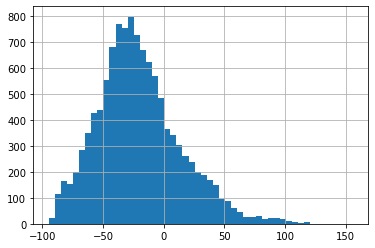

In [49]:
s = dfnz['Parks']
s.hist(bins=50)

In [50]:
#s.info() # Will give an error message
s.shape

(11932,)

In [51]:
# Converting a series into a DataFrame:
s.to_frame().head(3)

,Parks
Date,
2020-02-15,0.0
2020-02-16,-11.0
2020-02-17,-5.0


---

### Joining data using the index ###

Join data frames using the index is very easy, but it requires setting up the data. Both data frames need the same index.

The next example shows how to add the country names in Spanish to the main data frame (df). 

We need a list of Spanish country names that we can merge on the `Country region code`, which is the current index of the main data frame.

Luckily there is such a list: see this Github [link](https://github.com/stefangabos/world_countries/).

The next code prepares the data from Github, and the returns a list properly prepared for joining. 

I decided to write a function that allows us to make country name lists for various languages. 

In [52]:
def intl_country_names(ctry, new_column_name):
    # read from the cloud:
    dfj = pd.read_csv('https://cdn.jsdelivr.net/npm/world_countries_lists@latest/data/'+ctry.lower()+'/countries.csv')
    # convert the country codes to upper case:
    dfj['alpha2'] = dfj['alpha2'].str.upper()  
    # We need meaningful column names: 
    dfj.rename(columns = {'alpha2': 'Country region code', 'name': new_column_name}, inplace=True)
    # We need the index name to be the same as the one of the main data frame
    dfj = dfj.set_index('Country region code')
    # We don' t need the following colums
    dfj.drop(['id','alpha3'], inplace=True, axis ='columns')
    return dfj

dfj = intl_country_names('es', 'Nombre del país')
dfj

,Nombre del país
Country region code,
AF,Afganistán
AL,Albania
DE,Alemania
AD,Andorra
AO,Angola
...,...
VN,Vietnam
YE,Yemen
DJ,Yibuti


The next step is to perform the merge, which is dead easy, because we rely on `Country region code` as the key column for joining.

In [53]:
df = df.join(dfj)  

In [54]:
df.head()

,Country region,Sub region 1,Sub region 2,Metro area,Iso 3166 2 code,Census fips code,Place id,Date,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential,Nombre del país
Country region code,,,,,,,,,,,,,,,
AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0,Emiratos Árabes Unidos
AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0,Emiratos Árabes Unidos
AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0,Emiratos Árabes Unidos
AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0,Emiratos Árabes Unidos
AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0,Emiratos Árabes Unidos


In [55]:
df['Nombre del país'].value_counts()

Estados Unidos        1823423
Brasil                1426620
India                  472704
Turquía                388282
Argentina              298794
                       ...   
Kazajistán                709
Irak                      709
Papúa Nueva Guinea        706
Guinea-Bisáu              684
Liechtenstein             673
Name: Nombre del país, Length: 129, dtype: int64

---

**Question**: can we add a column with French names to our main data frame **without referring to a data frame directly**, but using the `intl_country_names` function instead? The relevant country code and column name are `fr` and  'Nom du pays'.

In [56]:
df = df.join(intl_country_names('fr', 'Nom du pays'))

In [57]:
df

,Country region,Sub region 1,Sub region 2,Metro area,Iso 3166 2 code,Census fips code,Place id,Date,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential,Nombre del país,Nom du pays
Country region code,,,,,,,,,,,,,,,,
AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0,Emiratos Árabes Unidos,Émirats arabes unis
AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0,Emiratos Árabes Unidos,Émirats arabes unis
AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0,Emiratos Árabes Unidos,Émirats arabes unis
AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0,Emiratos Árabes Unidos,Émirats arabes unis
AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0,Emiratos Árabes Unidos,Émirats arabes unis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,Namibia,Zambezi Region,NaN,NaN,NA-CA,NaN,ChIJ6ZWCJLviWRkR7vczZyMxxu4,2021-03-22,NaN,NaN,NaN,NaN,-59.0,NaN,NaN,NaN
NaN,Namibia,Zambezi Region,NaN,NaN,NA-CA,NaN,ChIJ6ZWCJLviWRkR7vczZyMxxu4,2021-04-05,NaN,NaN,NaN,NaN,-62.0,NaN,NaN,NaN
NaN,Namibia,Zambezi Region,NaN,NaN,NA-CA,NaN,ChIJ6ZWCJLviWRkR7vczZyMxxu4,2021-05-04,NaN,NaN,NaN,NaN,-57.0,NaN,NaN,NaN


---

### Performing operations on all but a few columns of a  data frame ###

Suppose we want to divide all values of the NZ data frame by 100 (without affecting the index values). This is relatively easy:

In [58]:
dfnz

,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Date,,,,,,
2020-02-15,8.0,5.0,0.0,8.0,4.0,0.0
2020-02-16,4.0,4.0,-11.0,7.0,0.0,1.0
2020-02-17,-2.0,-2.0,-5.0,15.0,31.0,-3.0
2020-02-18,-1.0,2.0,1.0,8.0,15.0,-1.0
2020-02-19,1.0,2.0,0.0,11.0,14.0,-2.0
...,...,...,...,...,...,...
2022-01-19,-5.0,NaN,-54.0,NaN,2.0,NaN
2022-01-20,0.0,NaN,-46.0,NaN,4.0,NaN
2022-01-21,14.0,NaN,-37.0,NaN,4.0,NaN


In [59]:
dfnz /= 100

In [60]:
dfnz.head(3)

,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Date,,,,,,
2020-02-15,0.08,0.05,0.00,0.08,0.04,0.00
2020-02-16,0.04,0.04,-0.11,0.07,0.00,0.01
2020-02-17,-0.02,-0.02,-0.05,0.15,0.31,-0.03


Again, this shows the power of indexing: You can 'hide' columns that you do not want to be affected by an operation in the index. Once you are done, you reset the index (by way of `df.reset_index(inplace=True)`) and continue working on your data frame. 

Of course, you can apply an operation to a single column (or a set of columns) by selecting them as shown before:
`dfnz['Date'] = pd.to_datetime(dfnz['Date'])`. 
But, if all except for a few columns should undergo the same treatment, then the approach shown above is the way to go.

---
### Consolidating our knowledge:  a graph ###

What we learned today can be used to make a nice graph.

<AxesSubplot:xlabel='Date'>

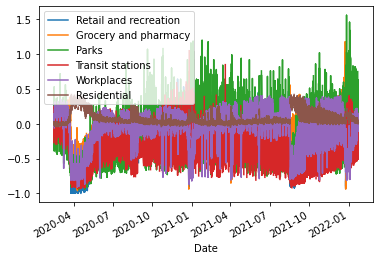

In [61]:
dfnz.plot()

Well, maybe we should tweak the graph.

We can resample the data to weekly data, not daily, using the `resample` command:

<AxesSubplot:title={'center':'Mobility data: Percentage Change from Base line (NZ).'}, xlabel='Date'>

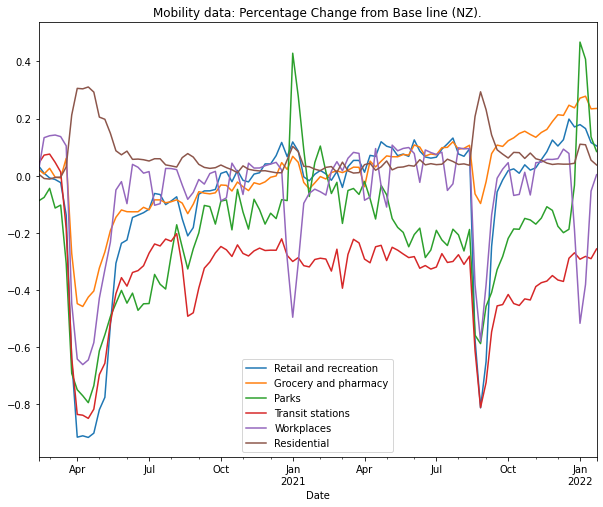

In [62]:
dfnz.resample('W').mean().plot(figsize=(10,8), title= 'Mobility data: Percentage Change from Base line (NZ).')

---
### Consolidating our knowledge: a function that shows the graph and returns a proper data set  ###

What we learned today can be combined into a single function, for which we can use the country code as an input. 

The start of the function checks if the data is already on disk. If not, it loads the data from the cloud.

In [63]:
import pandas as pd 
import numpy as np
import os

def arc_mobility(country_code):
    if os.path.isfile('Global_Mobility_Report.csv.zip'):
        fn = 'Global_Mobility_Report.csv.zip'
        file_location = 'Disk'
    else:
        fn = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
        file_location = 'Cloud'
        
    print(f'\nThe mobility data location: {file_location}.\n')
    df = pd.read_csv(fn, low_memory=False)

    df.columns = [x.replace('_percent_change_from_baseline', '').replace('_', ' ').strip().capitalize() for x in df]

    df = df.set_index('Country region code')

    df = df.loc[country_code, 'Date':'Residential']
    df['Date']= pd.to_datetime(df['Date'])
  
    df = df.reset_index().set_index('Date')

    df.drop("Country region code", inplace=True, axis ='columns')

    df /= 100

    df.resample('W').mean().plot(figsize=(10,8), title= 'Mobility data: Change from Base line ('+ country_code + ').')
    return df
    


The mobility data location: Disk.



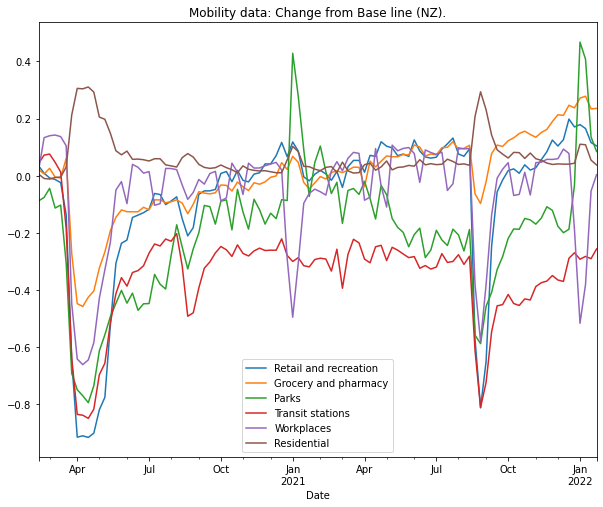

In [64]:
dfnz = arc_mobility('NZ')

In [65]:
dfnz

,Retail and recreation,Grocery and pharmacy,Parks,Transit stations,Workplaces,Residential
Date,,,,,,
2020-02-15,0.08,0.05,0.00,0.08,0.04,0.00
2020-02-16,0.04,0.04,-0.11,0.07,0.00,0.01
2020-02-17,-0.02,-0.02,-0.05,0.15,0.31,-0.03
2020-02-18,-0.01,0.02,0.01,0.08,0.15,-0.01
2020-02-19,0.01,0.02,0.00,0.11,0.14,-0.02
...,...,...,...,...,...,...
2022-01-19,-0.05,NaN,-0.54,NaN,0.02,NaN
2022-01-20,0.00,NaN,-0.46,NaN,0.04,NaN
2022-01-21,0.14,NaN,-0.37,NaN,0.04,NaN


\* See documentation on copy [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html).